This is code code for multiclass classification of 8 different skin cancers using pytorch




# Exploratory Data Analysis (EDA) 

This section includes loading and transforming the data, visualizing distributions of key features, and displaying a subset of images with their class labels.


In [1]:
import pandas as pd

# Load the CSV files
metadata_df = pd.read_csv('/kaggle/input/isic2019-filtered-dataset/Filtered_ISIC_2019_Training_Metadata.csv')
groundtruth_df = pd.read_csv('/kaggle/input/isic2019-filtered-dataset/Filtered_ISIC_2019_Training_GroundTruth.csv')


print('Metadata csv:\n',metadata_df.head())
print('\n')
print('Ground Truth csv:\n', groundtruth_df.head())


# Define a function to create a combined class label
def create_combined_class(row):
    classes = []
    if row['MEL'] == 1:
        classes.append('MEL')
    if row['NV'] == 1:
        classes.append('NV')
    if row['BCC'] == 1:
        classes.append('BCC')
    if row['AK'] == 1:
        classes.append('AK')
    if row['BKL'] == 1:
        classes.append('BKL')
    if row['DF'] == 1:
        classes.append('DF')
    if row['VASC'] == 1:
        classes.append('VASC')
    if row['SCC'] == 1:
        classes.append('SCC')
    return ','.join(classes)

# Apply the function to create a new column
groundtruth_df['combined_class'] = groundtruth_df.apply(create_combined_class, axis=1)

# Drop the original binary columns
binary_columns = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']
groundtruth_df = groundtruth_df.drop(columns=binary_columns)

# Save the transformed data to a new CSV file
new_file_path = '/kaggle/working/ground_truth_v1.csv'
groundtruth_df.to_csv(new_file_path, index=False)

print(f"Transformed data saved to {new_file_path}")



Metadata csv:
           image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male


Ground Truth csv:
           image  MEL  NV  BCC  AK  BKL  DF  VASC  SCC
0  ISIC_0000000    0   1    0   0    0   0     0    0
1  ISIC_0000001    0   1    0   0    0   0     0    0
2  ISIC_0000002    1   0    0   0    0   0     0    0
3  ISIC_0000003    0   1    0   0    0   0     0    0
4  ISIC_0000004    1   0    0   0    0   0     0    0
Transformed data saved to /kaggle/working/ground_truth_v1.csv


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


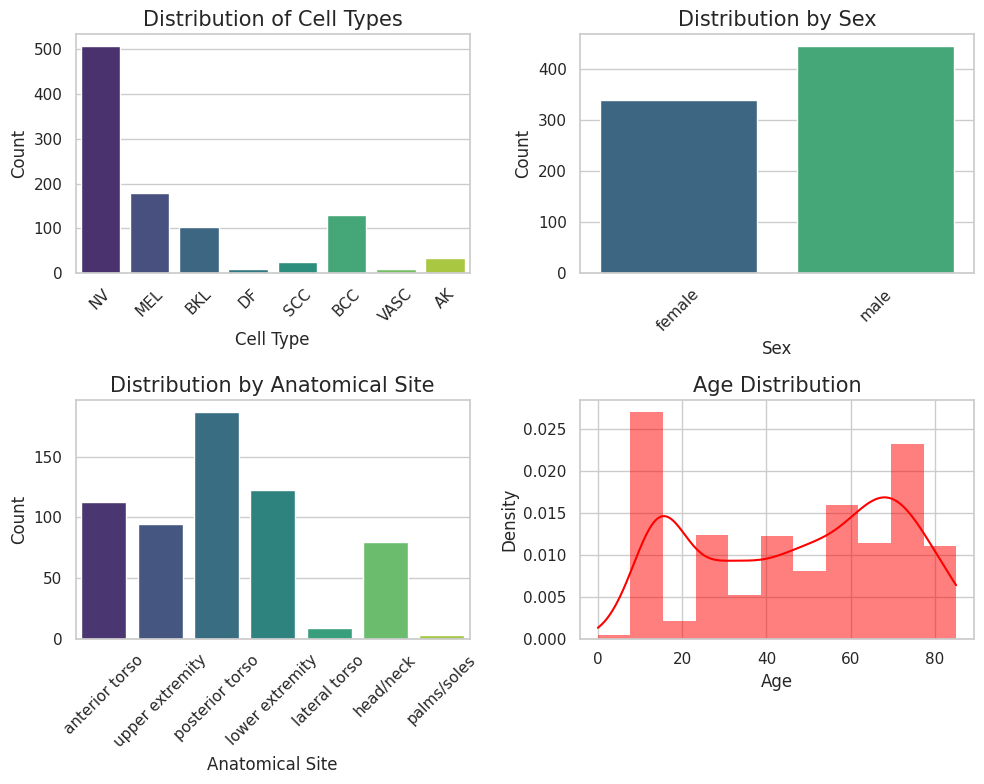

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


# Setting the style and palette for the plots
sns.set(style="whitegrid")

# Data distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot for Cell Type
sns.countplot(data=groundtruth_df, x='combined_class', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_xlabel('Cell Type', fontsize=12)
axes[0, 0].set_title('Distribution of Cell Types', fontsize=15)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot for Sex
sns.countplot(data=metadata_df, x='sex', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].set_xlabel('Sex', fontsize=12)
axes[0, 1].set_title('Distribution by Sex', fontsize=15)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot for Anatomical Site
sns.countplot(data=metadata_df, x='anatom_site_general', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].set_xlabel('Anatomical Site', fontsize=12)
axes[1, 0].set_title('Distribution by Anatomical Site', fontsize=15)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot for Age
sample_age = metadata_df[pd.notnull(metadata_df['age_approx'])]
sns.histplot(sample_age['age_approx'], kde=True, ax=axes[1, 1], color='red', stat="density", linewidth=0)
axes[1, 1].set_ylabel('Density', fontsize=12)
axes[1, 1].set_xlabel('Age', fontsize=12)
axes[1, 1].set_title('Age Distribution', fontsize=15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

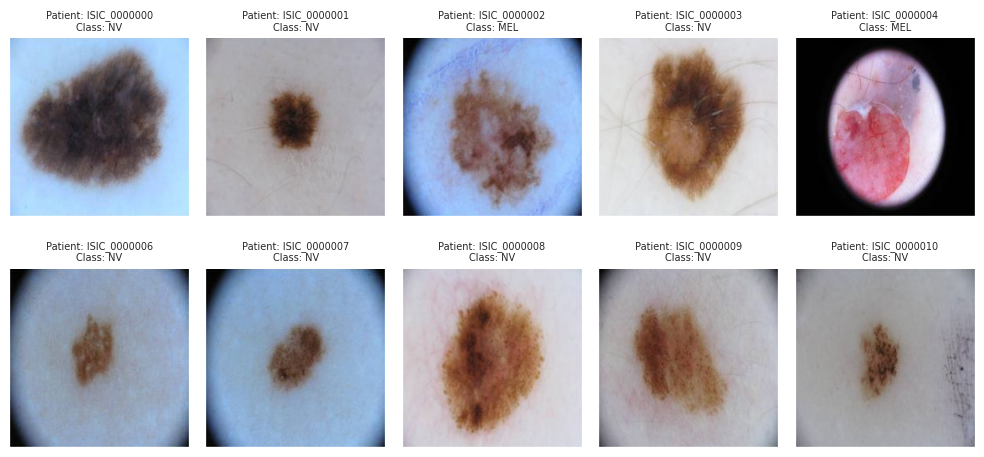

In [3]:
#reading images from the folder corresponding to the groundtruth csv
import matplotlib.pyplot as plt
from PIL import Image
import os

# Path to the folder containing the images
image_folder = '/kaggle/input/isic2019-filtered-dataset/Images/Images/'

# Number of images to display
num_images = 10

# Select a subset of the DataFrame
sample_df = groundtruth_df.head(num_images)

# Create a plot
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the DataFrame and plot images
for i, (index, row) in enumerate(sample_df.iterrows()):
    image_path = os.path.join(image_folder, row['image'] + '.jpg')  # Adjust extension if necessary

    # Read the image
    img = Image.open(image_path)

    # Display the image
    axes[i].imshow(img)
    axes[i].set_title(f"Patient: {row['image']}\nClass: {row['combined_class']}", fontsize=7)

    axes[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Label Encoding 

The LabelEncoder from scikit-learn is used to convert categorical text labels into numeric labels.

In [4]:
from sklearn.preprocessing import LabelEncoder

# label encoding to numeric values from text
le = LabelEncoder()
le.fit(groundtruth_df['combined_class'])
LabelEncoder()
#print(list(le.classes_))

#combined_df['label'] = le.transform(combined_df["combined_class"])
#print(combined_df.sample(10))

# Display the mapping of labels to integers
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)



Label Mapping: {'AK': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'MEL': 4, 'NV': 5, 'SCC': 6, 'VASC': 7}


combined_class
NV      508
MEL     179
BCC     131
BKL     104
AK       34
SCC      25
VASC     10
DF        9
Name: count, dtype: int64


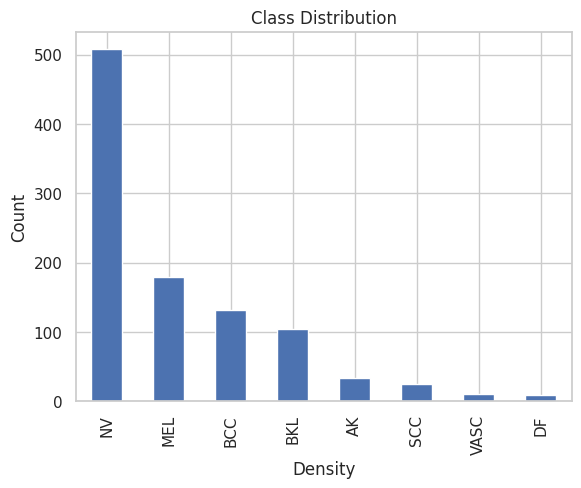

In [5]:
# Assuming 'density' is the target variable
class_counts = groundtruth_df['combined_class'].value_counts()
print(class_counts)

# Visualize class distribution
class_counts.plot(kind='bar', title='Class Distribution')
plt.xlabel('Density')
plt.ylabel('Count')
plt.show()


In [6]:
groundtruth_df['label'] = le.transform(groundtruth_df['combined_class'])
print(groundtruth_df.sample(10))


                        image combined_class  label
169  ISIC_0000182_downsampled             NV      5
624  ISIC_0007557_downsampled             NV      5
795              ISIC_0024332            BCC      1
365  ISIC_0000418_downsampled             NV      5
889              ISIC_0025182            SCC      6
339  ISIC_0000379_downsampled             NV      5
531  ISIC_0001449_downsampled             NV      5
627  ISIC_0007788_downsampled             NV      5
523  ISIC_0001306_downsampled             NV      5
574  ISIC_0003582_downsampled             NV      5


In [7]:
# Ensure the 'image' column has the correct filenames with .jpg extension
groundtruth_df['image'] = groundtruth_df['image'].apply(lambda x: x + '.jpg')

# Check if all images exist in the specified directory
image_folder = '/kaggle/input/isic2019-filtered-dataset/Images/Images/'  # Make sure this is the correct path to the images folder
missing_files = []

for image_name in groundtruth_df['image']:
    if not os.path.exists(os.path.join(image_folder, image_name)):
        missing_files.append(image_name)

if missing_files:
    print(f"Missing files: {len(missing_files)}")
    print(missing_files[:10])  # Print first 10 missing files for inspection
else:
    print("All files found.")

All files found.


# Dataset Preprocessing 

## 1. Stratified Sampling
As the dataset is highly imbalanced, I am using stratified sampling to ensure balanced representation of each class in training, validation and testing set

## 2. Oversampling
This will increase instances of minority classes to balance the dataset

## 3. Custom Data Generator
Inspired by [SIIM-ISIC Melanoma Classification Challenge 1st Place Winner Solution](https://www.youtube.com/watch?v=wXEDf0TFatA), I have employed a custom dtaa generator to load, preprocess and augment images in batches during training \


In [8]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import os


2024-08-03 13:48:27.103782: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 13:48:27.103838: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 13:48:27.105335: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
# Perform stratified sampling with train, validation, and test sets
train_val_df, test_df = train_test_split(groundtruth_df, test_size=0.2, stratify=groundtruth_df['combined_class'], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, stratify=train_val_df['combined_class'], random_state=42)  # 0.25 * 0.8 = 0.2

# Oversampling the training set
ros = RandomOverSampler(random_state=42)
train_df_resampled, train_labels_resampled = ros.fit_resample(train_df, train_df['combined_class'])

# Convert back to DataFrame
train_df_resampled['combined_class'] = train_labels_resampled


In [10]:
# Print class distribution in training and validation sets
print("Training set class distribution:")
print(train_df_resampled['combined_class'].value_counts())
print("\nValidation set class distribution:")
print(val_df['combined_class'].value_counts())
print("\nTest set class distribution:")
print(test_df['combined_class'].value_counts())


Training set class distribution:
combined_class
NV      305
MEL     305
DF      305
BCC     305
AK      305
BKL     305
SCC     305
VASC    305
Name: count, dtype: int64

Validation set class distribution:
combined_class
NV      102
MEL      36
BCC      26
BKL      21
AK        7
SCC       5
VASC      2
DF        1
Name: count, dtype: int64

Test set class distribution:
combined_class
NV      101
MEL      36
BCC      26
BKL      21
AK        7
SCC       5
DF        2
VASC      2
Name: count, dtype: int64


In [11]:
import time
from datetime import timedelta
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
import os
from albumentations.pytorch import ToTensorV2
import albumentations as A

In [12]:
# Define the augmentations for training
train_transform = A.Compose([
    A.Transpose(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.MotionBlur(p=0.5),
    A.MedianBlur(blur_limit=3, p=0.5),
    A.GaussianBlur(blur_limit=3, p=0.5),
    A.GaussNoise(p=0.5),
    A.OpticalDistortion(p=0.5),
    A.ElasticTransform(p=0.5),
    A.CLAHE(p=0.5),
    A.HueSaturationValue(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

val_transform = A.Compose([
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

class SkinCancerDataset(Dataset):
    def __init__(self, dataframe, image_dir, img_size, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.img_size = img_size
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe.iloc[idx]['image'])
        image = cv2.imread(img_name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, self.img_size)  # Resize image to the target size
        
        label = self.dataframe.iloc[idx]['label']
        
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        
        return image, label

# Parameters
batch_size = 32
img_size = (224, 224)
n_classes = len(groundtruth_df['label'].unique())

# Paths and data
image_folder = '/kaggle/input/isic2019-filtered-dataset/Images/Images/'

# Create the dataset and dataloader
train_dataset = SkinCancerDataset(train_df_resampled, image_folder, img_size, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

val_dataset = SkinCancerDataset(val_df, image_folder, img_size, transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


/opt/conda/lib/python3.10/site-packages/albumentations/augmentations/blur/transforms.py:180: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


In [13]:
# Check a batch of data from the train loader
for images, labels in train_loader:
    print(f"Train Loader - Images shape: {images.shape}")
    print(f"Train Loader - Labels shape: {labels.shape}")
    break  # Only need to check one batch


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Train Loader - Images shape: torch.Size([32, 3, 224, 224])
Train Loader - Labels shape: torch.Size([32])


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [14]:
# Check a batch of data from the validation loader
for images, labels in val_loader:
    print(f"Validation Loader - Images shape: {images.shape}")
    print(f"Validation Loader - Labels shape: {labels.shape}")
    break  # Only need to check one batch


Validation Loader - Images shape: torch.Size([32, 3, 224, 224])
Validation Loader - Labels shape: torch.Size([32])


In [15]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')


Using device: cuda


# Model Training

Two deep learning models DenseNet121 and VGG16 are trained using pytorch

## **DenseNet121**
DenseNet121 is pre-trained on the ImageNet dataset, which means it has already learned a wide range of features from a diverse set of images. Using this pre-trained model allows us to leverage these features and apply them to our specific task of skin cancer classification, reducing the need for extensive training and computational resources.

In [16]:
import torch.optim as optim
from torchvision import models
#from torchsummary import summary


# Load the DenseNet121 model with pre-trained weights
base_model = models.densenet121(pretrained=True)

# Custom DenseNet model
class CustomDenseNet(nn.Module):
    def __init__(self, base_model, num_classes):
        super(CustomDenseNet, self).__init__()
        self.base_model = base_model
        in_features = self.base_model.classifier.in_features
        self.base_model.classifier = nn.Identity()
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(in_features, 1024)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1024, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.base_model.features(x)
        #print(f'After base model features: {x.shape}')
        x = self.global_avg_pool(x)
        #print(f'After global average pooling: {x.shape}')
        x = torch.flatten(x, 1)
        #print(f'After flattening: {x.shape}')
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

model = CustomDenseNet(base_model, n_classes)

# Freeze the base model layers
for param in model.base_model.parameters():
    param.requires_grad = False

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [36]:
# Early Stopping
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def check_early_stop(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# Reduce Learning Rate on Plateau
class ReduceLROnPlateau:
    def __init__(self, optimizer, factor=0.1, patience=5, min_lr=1e-6):
        self.optimizer = optimizer
        self.factor = factor
        self.patience = patience
        self.min_lr = min_lr
        self.counter = 0
        self.best_loss = None

    def step(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss:
            self.counter += 1
            if self.counter >= self.patience:
                self._reduce_lr()
                self.counter = 0
        else:
            self.best_loss = val_loss
            self.counter = 0

    def _reduce_lr(self):
        for param_group in self.optimizer.param_groups:
            new_lr = max(param_group['lr'] * self.factor, self.min_lr)
            param_group['lr'] = new_lr
            print(f'Reduced learning rate to {new_lr}')

# Model Checkpointing
def save_checkpoint(model, epoch, val_loss, best_loss, path="model_checkpoint.pth"):
    if val_loss < best_loss:
        print(f'Saving model with val_loss {val_loss:.4f} at epoch {epoch+1}')
        torch.save(model.state_dict(), path)
        best_loss = val_loss
    return best_loss

In [37]:
# Initialize early stopping and learning rate scheduler
early_stopping = EarlyStopping(patience=10, min_delta=0.001)
lr_scheduler = ReduceLROnPlateau(optimizer, factor=0.2, patience=5, min_lr=1e-6)
best_loss = float('inf')


# Model Testing


In [19]:
# Track history
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Record the start time
start_time = time.time()

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    epoch_start_time = time.time()  # Start time for the epoch
    
    model.train()  # Set the model to training mode
    running_loss = 0.0
    corrects_train = 0
    total_train = 0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the model parameters

        running_loss += loss.item() * inputs.size(0)

        _, preds = torch.max(outputs, 1)
        corrects_train += torch.sum(preds == labels.data)
        total_train += labels.size(0)
        
        progress_bar.set_postfix(loss=loss.item())

    epoch_loss = running_loss / len(train_loader.dataset)
    train_acc = corrects_train.double() / total_train
    train_losses.append(epoch_loss)
    train_accuracies.append(train_acc.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {train_acc:.4f}')

    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    corrects_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            corrects_val += torch.sum(preds == labels.data)

    val_loss = val_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_acc = corrects_val.double() / len(val_loader.dataset)
    val_accuracies.append(val_acc.item())
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

    # Check for early stopping
    early_stopping.check_early_stop(val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

    # Step learning rate scheduler
    lr_scheduler.step(val_loss)

    # Save model checkpoint
    best_loss = save_checkpoint(model, epoch, val_loss, best_loss)
    
    epoch_end_time = time.time()  # End time for the epoch
    epoch_duration = epoch_end_time - epoch_start_time
    print(f'Time taken for epoch {epoch+1}: {epoch_duration:.2f} seconds')

# Calculate total training time
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=int(elapsed_time)))
print(f'Training time: {formatted_time}')

# Save the final model
torch.save(model.state_dict(), 'denseNet121_model.pth')
print("Model saved as denseNet121_model.pth")


Epoch 1/50: 100%|██████████| 77/77 [00:51<00:00,  1.50it/s, loss=1.56]


Epoch 1/50, Training Loss: 1.7522, Training Accuracy: 0.5541
Validation Loss: 1.6261, Validation Accuracy: 0.6500
Saving model with val_loss 1.6261 at epoch 1
Time taken for epoch 1: 52.23 seconds


Epoch 2/50: 100%|██████████| 77/77 [00:48<00:00,  1.57it/s, loss=1.6] 

Epoch 2/50, Training Loss: 1.6432, Training Accuracy: 0.6332


Validation Loss: 1.5525, Validation Accuracy: 0.7050
Saving model with val_loss 1.5525 at epoch 2
Time taken for epoch 2: 49.92 seconds


Epoch 3/50: 100%|██████████| 77/77 [00:49<00:00,  1.54it/s, loss=1.63]

Epoch 3/50, Training Loss: 1.5983, Training Accuracy: 0.6816


Validation Loss: 1.5231, Validation Accuracy: 0.7500
Saving model with val_loss 1.5231 at epoch 3
Time taken for epoch 3: 50.87 seconds


Epoch 4/50: 100%|██████████| 77/77 [00:55<00:00,  1.39it/s, loss=1.55]

Epoch 4/50, Training Loss: 1.6002, Training Accuracy: 0.6713


Validation Loss: 1.5335, Validation Accuracy: 0.7500
Time taken for epoch 4: 58.83 seconds


Epoch 5/50: 100%|██████████| 77/77 [01:07<00:00,  1.14it/s, loss=1.69]

Epoch 5/50, Training Loss: 1.5824, Training Accuracy: 0.6910


Validation Loss: 1.5326, Validation Accuracy: 0.7350
Time taken for epoch 5: 68.86 seconds


Epoch 6/50: 100%|██████████| 77/77 [00:51<00:00,  1.49it/s, loss=1.47]

Epoch 6/50, Training Loss: 1.5833, Training Accuracy: 0.6873


Validation Loss: 1.5019, Validation Accuracy: 0.7900
Saving model with val_loss 1.5019 at epoch 6
Time taken for epoch 6: 52.80 seconds


Epoch 7/50: 100%|██████████| 77/77 [00:52<00:00,  1.47it/s, loss=1.84]

Epoch 7/50, Training Loss: 1.5667, Training Accuracy: 0.7020


Validation Loss: 1.5211, Validation Accuracy: 0.7600
Time taken for epoch 7: 53.42 seconds


Epoch 8/50: 100%|██████████| 77/77 [00:50<00:00,  1.51it/s, loss=1.52]

Epoch 8/50, Training Loss: 1.5626, Training Accuracy: 0.7094


Validation Loss: 1.5463, Validation Accuracy: 0.7250
Time taken for epoch 8: 51.72 seconds


Epoch 9/50: 100%|██████████| 77/77 [00:51<00:00,  1.51it/s, loss=1.52]

Epoch 9/50, Training Loss: 1.5561, Training Accuracy: 0.7156


Validation Loss: 1.5223, Validation Accuracy: 0.7500
Time taken for epoch 9: 51.93 seconds


Epoch 10/50: 100%|██████████| 77/77 [00:51<00:00,  1.50it/s, loss=1.65]

Epoch 10/50, Training Loss: 1.5464, Training Accuracy: 0.7246


Validation Loss: 1.5189, Validation Accuracy: 0.7550
Time taken for epoch 10: 52.13 seconds


Epoch 11/50: 100%|██████████| 77/77 [00:51<00:00,  1.50it/s, loss=1.52]

Epoch 11/50, Training Loss: 1.5325, Training Accuracy: 0.7447


Validation Loss: 1.5202, Validation Accuracy: 0.7550
Reduced learning rate to 0.0002
Time taken for epoch 11: 52.06 seconds


Epoch 12/50: 100%|██████████| 77/77 [00:51<00:00,  1.51it/s, loss=1.79]

Epoch 12/50, Training Loss: 1.5378, Training Accuracy: 0.7332


Validation Loss: 1.5203, Validation Accuracy: 0.7400
Time taken for epoch 12: 51.95 seconds


Epoch 13/50: 100%|██████████| 77/77 [00:50<00:00,  1.51it/s, loss=2]   

Epoch 13/50, Training Loss: 1.5322, Training Accuracy: 0.7402


Validation Loss: 1.5225, Validation Accuracy: 0.7550
Time taken for epoch 13: 51.77 seconds


Epoch 14/50: 100%|██████████| 77/77 [00:49<00:00,  1.54it/s, loss=1.28]

Epoch 14/50, Training Loss: 1.5167, Training Accuracy: 0.7541


Validation Loss: 1.5141, Validation Accuracy: 0.7600
Time taken for epoch 14: 50.85 seconds


Epoch 15/50: 100%|██████████| 77/77 [00:50<00:00,  1.53it/s, loss=1.66]

Epoch 15/50, Training Loss: 1.5098, Training Accuracy: 0.7590


Validation Loss: 1.5288, Validation Accuracy: 0.7350
Time taken for epoch 15: 51.30 seconds


Epoch 16/50: 100%|██████████| 77/77 [00:51<00:00,  1.50it/s, loss=1.61]

Epoch 16/50, Training Loss: 1.5162, Training Accuracy: 0.7561


Validation Loss: 1.5071, Validation Accuracy: 0.7800
Early stopping
Training time: 0:14:12
Model saved as denseNet121_model.pth


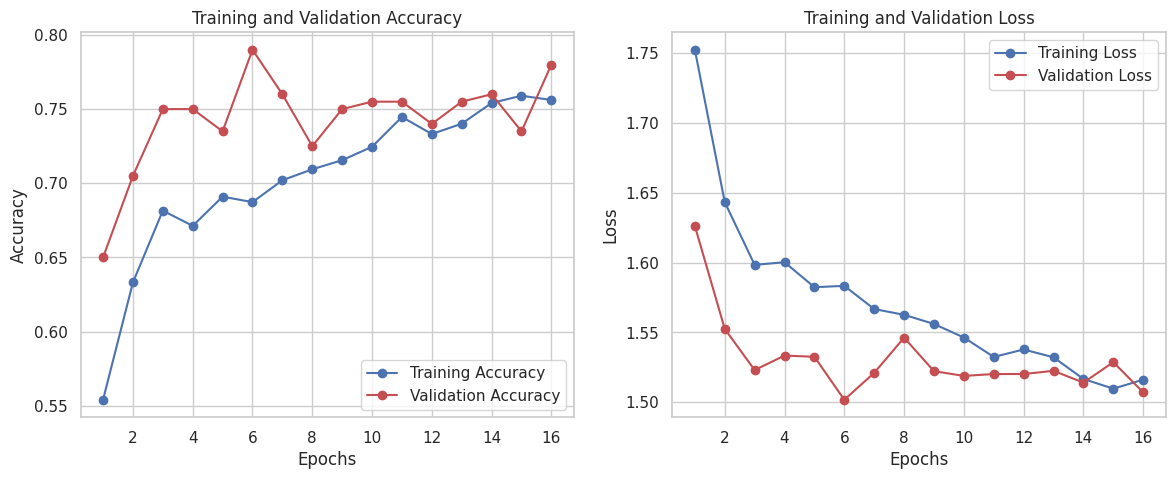

In [20]:
import matplotlib.pyplot as plt

# Assuming train_accuracies, val_accuracies, train_losses, and val_losses are lists
# containing the respective values for each epoch.

epochs = range(1, len(train_losses) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [26]:
# Get the unique classes
unique_classes = groundtruth_df['label'].unique()
print(f"Unique classes: {unique_classes}")
num_classes = len(unique_classes)

Unique classes: [5 4 2 3 6 1 7 0]


In [27]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the validation set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


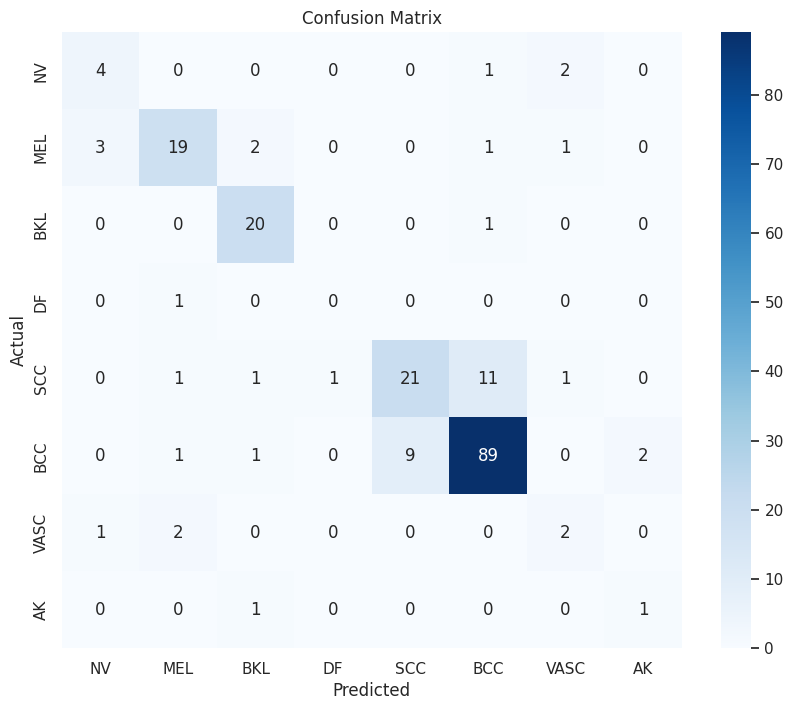

              precision    recall  f1-score   support

          NV       0.50      0.57      0.53         7
         MEL       0.79      0.73      0.76        26
         BKL       0.80      0.95      0.87        21
          DF       0.00      0.00      0.00         1
         SCC       0.70      0.58      0.64        36
         BCC       0.86      0.87      0.87       102
        VASC       0.33      0.40      0.36         5
          AK       0.33      0.50      0.40         2

    accuracy                           0.78       200
   macro avg       0.54      0.58      0.55       200
weighted avg       0.78      0.78      0.78       200



In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming combined_class is a list of class labels in the same order as they appear in the confusion matrix
combined_class = groundtruth_df['combined_class'].unique()

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=combined_class, yticklabels=combined_class)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(all_labels, all_preds, target_names=combined_class))


## **VGG16**

In [33]:
import torch.optim as optim
from torchvision import models
import torch.nn as nn
import torch

# Load the VGG16 model with pre-trained weights
base_model = models.vgg16(pretrained=True)

# Custom VGG16 model
class CustomVGG16(nn.Module):
    def __init__(self, base_model, num_classes):
        super(CustomVGG16, self).__init__()
        self.base_model = base_model
        in_features = self.base_model.classifier[6].in_features
        self.base_model.classifier[6] = nn.Identity()  # Remove the existing classifier
        self.fc1 = nn.Linear(in_features, 1024)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1024, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.base_model.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.base_model.classifier(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

vgg16model = CustomVGG16(base_model, n_classes)

# Freeze the base model layers
for param in vgg16model.base_model.parameters():
    param.requires_grad = False

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16model = vgg16model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16model.parameters(), lr=0.001)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 172MB/s] 


In [38]:
# Track history
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Record the start time
start_time = time.time()

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    epoch_start_time = time.time()  # Start time for the epoch
    
    vgg16model.train()  # Set the model to training mode
    running_loss = 0.0
    corrects_train = 0
    total_train = 0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = vgg16model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the model parameters

        running_loss += loss.item() * inputs.size(0)

        _, preds = torch.max(outputs, 1)
        corrects_train += torch.sum(preds == labels.data)
        total_train += labels.size(0)
        
        progress_bar.set_postfix(loss=loss.item())

    epoch_loss = running_loss / len(train_loader.dataset)
    train_acc = corrects_train.double() / total_train
    train_losses.append(epoch_loss)
    train_accuracies.append(train_acc.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {train_acc:.4f}')

    vgg16model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    corrects_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vgg16model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            corrects_val += torch.sum(preds == labels.data)

    val_loss = val_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_acc = corrects_val.double() / len(val_loader.dataset)
    val_accuracies.append(val_acc.item())
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

    # Check for early stopping
    early_stopping.check_early_stop(val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

    # Step learning rate scheduler
    lr_scheduler.step(val_loss)

    # Save model checkpoint
    best_loss = save_checkpoint(vgg16model, epoch, val_loss, best_loss)
    
    epoch_end_time = time.time()  # End time for the epoch
    epoch_duration = epoch_end_time - epoch_start_time
    print(f'Time taken for epoch {epoch+1}: {epoch_duration:.2f} seconds')

# Calculate total training time
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=int(elapsed_time)))
print(f'Training time: {formatted_time}')

# Save the final model
torch.save(vgg16model.state_dict(), 'vgg16_model.pth')
print("Model saved as vgg16_model.pth")


Epoch 1/50: 100%|██████████| 77/77 [00:50<00:00,  1.51it/s, loss=1.7] 

Epoch 1/50, Training Loss: 1.7305, Training Accuracy: 0.5393


Validation Loss: 1.8524, Validation Accuracy: 0.4200
Saving model with val_loss 1.8524 at epoch 1
Time taken for epoch 1: 53.44 seconds


Epoch 2/50: 100%|██████████| 77/77 [00:51<00:00,  1.50it/s, loss=2.09]

Epoch 2/50, Training Loss: 1.7250, Training Accuracy: 0.5455


Validation Loss: 1.8310, Validation Accuracy: 0.4300
Saving model with val_loss 1.8310 at epoch 2
Time taken for epoch 2: 54.02 seconds


Epoch 3/50: 100%|██████████| 77/77 [00:50<00:00,  1.53it/s, loss=1.87]

Epoch 3/50, Training Loss: 1.6990, Training Accuracy: 0.5713


Validation Loss: 1.7924, Validation Accuracy: 0.4800
Saving model with val_loss 1.7924 at epoch 3
Time taken for epoch 3: 53.07 seconds


Epoch 4/50: 100%|██████████| 77/77 [00:50<00:00,  1.52it/s, loss=1.4] 

Epoch 4/50, Training Loss: 1.7153, Training Accuracy: 0.5508


Validation Loss: 1.8147, Validation Accuracy: 0.4600
Time taken for epoch 4: 51.82 seconds


Epoch 5/50: 100%|██████████| 77/77 [00:51<00:00,  1.49it/s, loss=1.75]

Epoch 5/50, Training Loss: 1.6932, Training Accuracy: 0.5750


Validation Loss: 1.7141, Validation Accuracy: 0.5500
Saving model with val_loss 1.7141 at epoch 5
Time taken for epoch 5: 54.30 seconds


Epoch 6/50: 100%|██████████| 77/77 [00:49<00:00,  1.54it/s, loss=1.76]

Epoch 6/50, Training Loss: 1.6978, Training Accuracy: 0.5701


Validation Loss: 1.6664, Validation Accuracy: 0.6050
Saving model with val_loss 1.6664 at epoch 6
Time taken for epoch 6: 52.55 seconds


Epoch 7/50: 100%|██████████| 77/77 [00:52<00:00,  1.48it/s, loss=1.28]

Epoch 7/50, Training Loss: 1.7135, Training Accuracy: 0.5557


Validation Loss: 1.8747, Validation Accuracy: 0.3950
Time taken for epoch 7: 53.38 seconds


Epoch 8/50: 100%|██████████| 77/77 [00:51<00:00,  1.50it/s, loss=1.79]

Epoch 8/50, Training Loss: 1.6831, Training Accuracy: 0.5861


Validation Loss: 1.8058, Validation Accuracy: 0.4500
Time taken for epoch 8: 52.47 seconds


Epoch 9/50: 100%|██████████| 77/77 [00:51<00:00,  1.49it/s, loss=1.65]

Epoch 9/50, Training Loss: 1.6852, Training Accuracy: 0.5844


Validation Loss: 1.7877, Validation Accuracy: 0.4950
Time taken for epoch 9: 52.93 seconds


Epoch 10/50: 100%|██████████| 77/77 [00:50<00:00,  1.52it/s, loss=1.9] 

Epoch 10/50, Training Loss: 1.6891, Training Accuracy: 0.5795


Validation Loss: 1.8347, Validation Accuracy: 0.4400
Time taken for epoch 10: 51.82 seconds


Epoch 11/50: 100%|██████████| 77/77 [00:51<00:00,  1.50it/s, loss=1.66]

Epoch 11/50, Training Loss: 1.6870, Training Accuracy: 0.5824


Validation Loss: 1.7393, Validation Accuracy: 0.5250
Reduced learning rate to 0.0002
Time taken for epoch 11: 52.46 seconds


Epoch 12/50: 100%|██████████| 77/77 [00:50<00:00,  1.53it/s, loss=1.68]

Epoch 12/50, Training Loss: 1.6595, Training Accuracy: 0.6078


Validation Loss: 1.7659, Validation Accuracy: 0.4950
Time taken for epoch 12: 51.63 seconds


Epoch 13/50: 100%|██████████| 77/77 [00:49<00:00,  1.55it/s, loss=1.6] 

Epoch 13/50, Training Loss: 1.6440, Training Accuracy: 0.6279


Validation Loss: 1.7823, Validation Accuracy: 0.4850
Time taken for epoch 13: 50.80 seconds


Epoch 14/50: 100%|██████████| 77/77 [00:50<00:00,  1.53it/s, loss=1.72]

Epoch 14/50, Training Loss: 1.6490, Training Accuracy: 0.6217


Validation Loss: 1.7846, Validation Accuracy: 0.4850
Time taken for epoch 14: 51.67 seconds


Epoch 15/50: 100%|██████████| 77/77 [00:49<00:00,  1.55it/s, loss=1.65]

Epoch 15/50, Training Loss: 1.6351, Training Accuracy: 0.6348


Validation Loss: 1.7268, Validation Accuracy: 0.5400
Time taken for epoch 15: 51.04 seconds


Epoch 16/50: 100%|██████████| 77/77 [00:50<00:00,  1.53it/s, loss=1.55]

Epoch 16/50, Training Loss: 1.6456, Training Accuracy: 0.6217


Validation Loss: 1.7053, Validation Accuracy: 0.5700
Early stopping
Training time: 0:13:59
Model saved as vgg16_model.pth


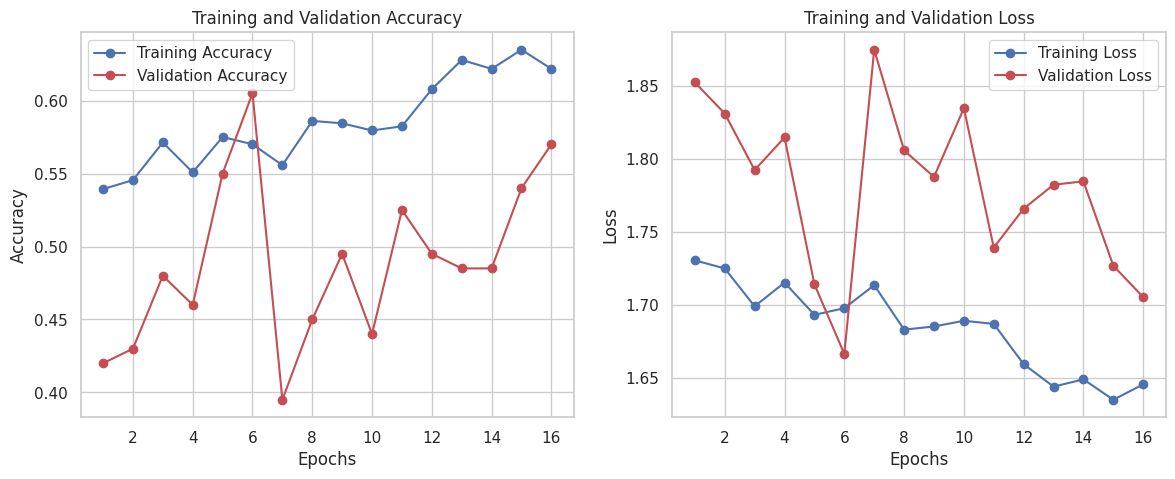

In [39]:
import matplotlib.pyplot as plt

# Assuming train_accuracies, val_accuracies, train_losses, and val_losses are lists
# containing the respective values for each epoch.

epochs = range(1, len(train_losses) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [40]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the validation set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg16model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)


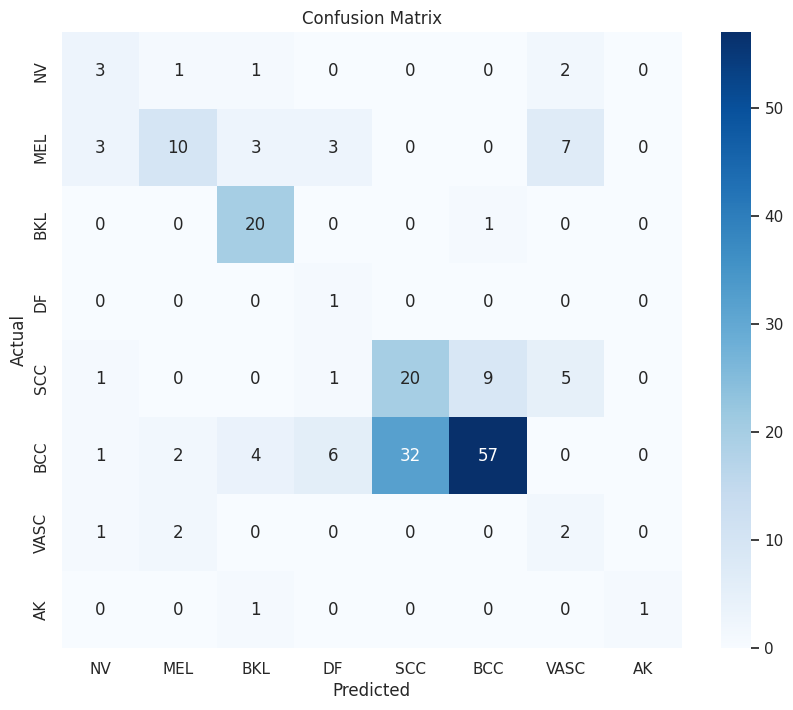

              precision    recall  f1-score   support

          NV       0.33      0.43      0.38         7
         MEL       0.67      0.38      0.49        26
         BKL       0.69      0.95      0.80        21
          DF       0.09      1.00      0.17         1
         SCC       0.38      0.56      0.45        36
         BCC       0.85      0.56      0.67       102
        VASC       0.12      0.40      0.19         5
          AK       1.00      0.50      0.67         2

    accuracy                           0.57       200
   macro avg       0.52      0.60      0.48       200
weighted avg       0.69      0.57      0.60       200



In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming combined_class is a list of class labels in the same order as they appear in the confusion matrix
combined_class = groundtruth_df['combined_class'].unique()

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=combined_class, yticklabels=combined_class)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(all_labels, all_preds, target_names=combined_class))
